In [2]:
# 引用sklearn 模块
from sklearn import tree
from sklearn.metrics import classification_report
import sklearn.metrics
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings #忽略警告提示
warnings.filterwarnings('ignore')
import os
import numpy as np
from scipy import  stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [3]:
data=pd.read_excel("C:\\Users\\kong4\\模型算法\\太平洋产能提升数据汇总.xlsx")
##挑选可用变量作为新的数据集

In [4]:
##挑选可用变量作为新的数据集
choose_feature_data=pd.concat([data[['车牌号','是否成交','通话时长','对话轮询次数','末句角色']],data.iloc[:,38:]],axis=1)
choose_feature_data.head()

,车牌号,是否成交,通话时长,对话轮询次数,末句角色,通话次数,保险公司有熟人朋友 [ 总公司 ]_x,比别家保险贵 [ 总公司 ],对比平安人保 [ 总公司 ],改约时间 [ 总公司 ],...,主动咨询_是否垫付 [ 总公司 ],保险公司有熟人朋友 [ 总公司 ]_y,不差钱客户 [ 总公司 ],地区优势 [ 总公司 ],减少险种_不准 [ 总公司 ],较强势客户 [ 总公司 ],已买保险 [ 总公司 ],营销阶段_付款介绍 [ 总公司 ],比别家保险便宜 [ 总公司 ],服务是否满意 ]
0,浙A871ZJ,T,28,6,B,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,浙A884VX,T,908,194,B,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,浙D06B27,F,134,50,B,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,浙F099P0,F,47,17,A,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,浙G816SF,F,166,22,B,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
'''choose_feature_data=choose_feature_data[choose_feature_data['客户意向_考虑太平洋 [ 总公司 ]']==0]
del choose_feature_data['客户意向_考虑太平洋 [ 总公司 ]']
choose_feature_data.shape '''

"choose_feature_data=choose_feature_data[choose_feature_data['客户意向_考虑太平洋 [ 总公司 ]']==0]\ndel choose_feature_data['客户意向_考虑太平洋 [ 总公司 ]']\nchoose_feature_data.shape "

In [6]:
choose_feature_data['是否成交'].groupby(choose_feature_data['是否成交']).count()/choose_feature_data.shape[0]

是否成交
F    0.812271
T    0.187729
Name: 是否成交, dtype: float64

In [7]:
choose_feature_data['末句角色'][choose_feature_data['末句角色']=='A']=1
choose_feature_data['末句角色'][choose_feature_data['末句角色']=='B']=2

[[10154   622]
 [ 1146  1393]]
              precision    recall  f1-score   support

           F       0.90      0.94      0.92     10776
           T       0.69      0.55      0.61      2539

    accuracy                           0.87     13315
   macro avg       0.79      0.75      0.77     13315
weighted avg       0.86      0.87      0.86     13315



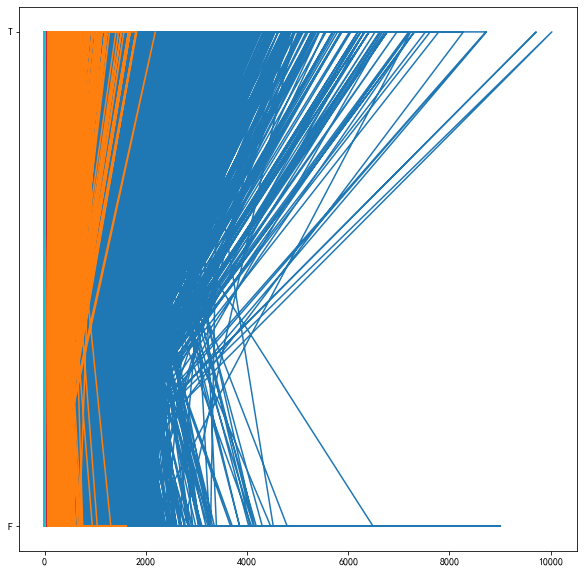

In [8]:
y=choose_feature_data["是否成交"]
x=choose_feature_data.loc[:,'通话时长':]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.85)
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5)
clf.fit(train_x,train_y)
# 查看模型预测结果
train_est = clf.predict(train_x)  #  用模型预测训练集的结果
train_est_p=clf.predict_proba(train_x)[:,1]  #用模型预测训练集的概率
test_est=clf.predict(test_x)  #  用模型预测测试集的结果
test_est_p=clf.predict_proba(test_x)[:,1]  #  用模型预测测试集的概率
# 查看测试集预测结果与真实结果对比
pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p}).T 
import sklearn.metrics as metrics
print(metrics.confusion_matrix(test_y, test_est,labels=['F','T']))  # 混淆矩阵
print(metrics.classification_report(test_y, test_est))  # 计算评估指标

# 模型优化

In [5]:
##挑选可用变量作为新的数据集
choose_feature_data=pd.concat([data[['车牌号','是否成交','通话时长','对话轮询次数','末句角色','开始沟通时间','最后沟通时间']],data.iloc[:,38:]],axis=1)

In [6]:
choose_feature_data['末句角色'][choose_feature_data['末句角色']=='A']=1
choose_feature_data['末句角色'][choose_feature_data['末句角色']=='B']=2

In [8]:
##增加字段开售沟通时间和最后沟通时间间隔天数
list_1=[]
for i in range(choose_feature_data.shape[0]):
    x=(pd.Timestamp(choose_feature_data['最后沟通时间'][i])-pd.Timestamp(choose_feature_data['开始沟通时间'][i])).days
    list_1.append(x)

In [9]:
choose_feature_data['间隔天数']=list_1
del choose_feature_data['开始沟通时间']
del choose_feature_data['最后沟通时间']

In [10]:
choose_feature_data_cp=choose_feature_data.copy()

In [11]:
##增加字段平均通话时长
choose_feature_data['平均次数通话时长']= round(choose_feature_data['通话时长']/choose_feature_data['通话次数'],2)
#添加字段平均通话频次
choose_feature_data['平均通话频次']=round(choose_feature_data['间隔天数']/choose_feature_data['通话次数'],2)

In [12]:
del choose_feature_data['通话时长'] 
del choose_feature_data['间隔天数']

In [13]:
choose_feature_data['是否成交'][choose_feature_data['是否成交']=='F']=0
choose_feature_data['是否成交'][choose_feature_data['是否成交']=='T']=1

In [14]:
choose_feature_data['报价聚合']=choose_feature_data['是否主动_口头索要报价 [ 总公司 ]']+choose_feature_data['是否主动_信息索要报价 [ 总公司 ]']+choose_feature_data['是否主动_添加微信 [ 总公司 ]']
choose_feature_data['保险公司有熟人朋友 [ 总公司 ]_y'][choose_feature_data['保险公司有熟人朋友 [ 总公司 ]_y']==1]=2
choose_feature_data['保险公司是否有熟人朋友']=choose_feature_data['保险公司有熟人朋友 [ 总公司 ]_y']+choose_feature_data['保险公司有熟人朋友 [ 总公司 ]_x']
choose_feature_data['比别家保险贵 [ 总公司 ]'][choose_feature_data['比别家保险贵 [ 总公司 ]']==1]=2
choose_feature_data['是否比别家保险便宜']=choose_feature_data['比别家保险贵 [ 总公司 ]']+choose_feature_data['比别家保险便宜 [ 总公司 ]']
choose_feature_data['客户意向_不考虑太平洋 [ 总公司 ]'][choose_feature_data['客户意向_不考虑太平洋 [ 总公司 ]']==1]=2
choose_feature_data['是否考虑太平洋']=choose_feature_data['客户意向_不考虑太平洋 [ 总公司 ]']+choose_feature_data['客户意向_考虑太平洋 [ 总公司 ]']

In [15]:
choose_feature_data.columns

Index(['车牌号', '是否成交', '对话轮询次数', '末句角色', '通话次数', '保险公司有熟人朋友 [ 总公司 ]_x',
       '比别家保险贵 [ 总公司 ]', '对比平安人保 [ 总公司 ]', '改约时间 [ 总公司 ]', '给太平台打过电话 [ 总公司 ]',
       '关注保额 [ 总公司 ]', '关注价格 [ 总公司 ]', '关注理赔时效服务 [ 总公司 ]',
       '和其他保险公司做对比 [ 总公司 ]', '活动满意 [ 总公司 ]', '经济紧张 [ 总公司 ]',
       '拒绝活动_送礼品 [ 总公司 ]', '考虑犹豫型 [ 总公司 ]', '客户持怀疑态度 [ 总公司 ]',
       '客户意向_不考虑太平洋 [ 总公司 ]', '客户意向_过段时间购买 [ 总公司 ]', '客户意向_考虑太平洋 [ 总公司 ]',
       '客户意向_只考虑某家保险 [ 总公司 ]', '肯定答复 [ 总公司 ]', '了解太保 [ 总公司 ]',
       '了解太平洋_大公司 [ 总公司 ]', '买过保险 [ 总公司 ]', '明确表示_考虑换公司 [ 总公司 ]',
       '品牌导向型 [ 总公司 ]', '前保险公司_人保平安 [ 总公司 ]', '商量型 [ 总公司 ]',
       '慎重考虑_竞争对比 [ 总公司 ]', '是否_车多一族 [ 总公司 ]', '是否主动_口头索要报价 [ 总公司 ]',
       '是否主动_留电话 [ 总公司 ]', '是否主动_添加微信 [ 总公司 ]', '是否主动_信息索要报价 [ 总公司 ]',
       '未理赔过客户 [ 总公司 ]', '嫌麻烦 [ 总公司 ]', '性别_男 [ 总公司 ]', '性别_女 [ 总公司 ]',
       '厌烦型 [ 总公司 ]', '易于引导 [ 总公司 ]', '愿意沟通 [ 总公司 ]', '在4s店购买过 [ 总公司 ]',
       '在忙改约时间 [ 总公司 ]', '在忙推迟型 [ 总公司 ]', '直接拒绝 [ 总公司 ]', '主动咨询_公司地址 [ 总公司 ]',
       '主动咨询_活动 [ 总公司 ]', '主动咨询_加险价格 

[[13611   824]
 [ 1217  2101]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14435
           1       0.72      0.63      0.67      3318

    accuracy                           0.89     17753
   macro avg       0.82      0.79      0.80     17753
weighted avg       0.88      0.89      0.88     17753

AUC = 0.7881


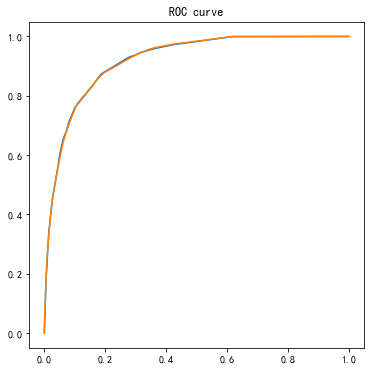

In [18]:
y=choose_feature_data[["车牌号","是否成交"]]
x=choose_feature_data.loc[:,'对话轮询次数':]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.8,random_state=42)
决策树训练集备份=train_y.copy()
决策树测试集备份=test_y.copy()
train_y=train_y['是否成交']
test_y=test_y['是否成交']
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)
clf.fit(train_x,train_y.astype('int'))
# 查看模型预测结果
train_est = clf.predict(train_x)  #  用模型预测训练集的结果
train_est_p=clf.predict_proba(train_x)[:,1]  #用模型预测训练集的概率
test_est=clf.predict(test_x)  #  用模型预测测试集的结果
test_est_p=clf.predict_proba(test_x)[:,1]  #  用模型预测测试集的概率
# 查看测试集预测结果与真实结果对比
pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p}).T 
import sklearn.metrics as metrics
print(metrics.confusion_matrix(test_y.astype('int'), test_est,labels=[0,1]))  # 混淆矩阵
print(metrics.classification_report(test_y.astype('int'), test_est))  # 计算评估指标
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'),test_est)
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test)) 
##过拟合，训练集效果好于测试集
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'), test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_y.astype('int'), train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.title('ROC curve')
plt.show()

In [21]:
##输出测试集,训练集结果
输出结果=pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p})
决策树推出数据集=pd.concat([决策树测试集备份,输出结果],axis=1)
del 决策树推出数据集['是否成交']

随机森林

[[13703   732]
 [ 1266  2052]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     14435
           1       0.74      0.62      0.67      3318

    accuracy                           0.89     17753
   macro avg       0.83      0.78      0.80     17753
weighted avg       0.88      0.89      0.88     17753

AUC = 0.7839


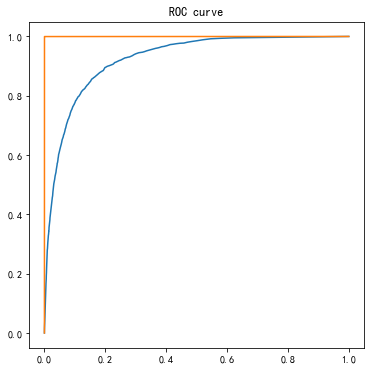

In [22]:
y=choose_feature_data[["车牌号","是否成交"]]
x=choose_feature_data.loc[:,'对话轮询次数':]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.80,random_state = 42)
随机森林训练集备份=train_y.copy()
随机森林测试集备份=test_y.copy()
train_y=train_y['是否成交']
test_y=test_y['是否成交']
from sklearn import ensemble
# 构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=300, random_state=1234)
# 随机森林的拟合
RF_class.fit(train_x, train_y.astype('int'))
# 查看模型预测结果
train_est = RF_class.predict(train_x)  #  用模型预测训练集的结果
train_est_p=RF_class.predict_proba(train_x)[:,1]  #用模型预测训练集的概率
test_est=RF_class.predict(test_x)  #  用模型预测测试集的结果
test_est_p=RF_class.predict_proba(test_x)[:,1]  #  用模型预测测试集的概率
# 查看测试集预测结果与真实结果对比
pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p}).T 
print(metrics.confusion_matrix(test_y.astype('int'), test_est,labels=[0,1]))  # 混淆矩阵
print(metrics.classification_report(test_y.astype('int'), test_est))  # 计算评估指标
import sklearn.metrics as metrics
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'),test_est)
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test)) 
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'), test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_y.astype('int'), train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.title('ROC curve')
plt.show()

In [24]:
##输出测试集,训练集结果
输出结果=pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p})
随机森林推出数据集=pd.concat([随机森林测试集备份,输出结果],axis=1)
del 随机森林推出数据集['是否成交']

逻辑回归

In [25]:
choose_feature_data.columns

Index(['车牌号', '是否成交', '对话轮询次数', '末句角色', '通话次数', '保险公司有熟人朋友 [ 总公司 ]_x',
       '比别家保险贵 [ 总公司 ]', '对比平安人保 [ 总公司 ]', '改约时间 [ 总公司 ]', '给太平台打过电话 [ 总公司 ]',
       '关注保额 [ 总公司 ]', '关注价格 [ 总公司 ]', '关注理赔时效服务 [ 总公司 ]',
       '和其他保险公司做对比 [ 总公司 ]', '活动满意 [ 总公司 ]', '经济紧张 [ 总公司 ]',
       '拒绝活动_送礼品 [ 总公司 ]', '考虑犹豫型 [ 总公司 ]', '客户持怀疑态度 [ 总公司 ]',
       '客户意向_不考虑太平洋 [ 总公司 ]', '客户意向_过段时间购买 [ 总公司 ]', '客户意向_考虑太平洋 [ 总公司 ]',
       '客户意向_只考虑某家保险 [ 总公司 ]', '肯定答复 [ 总公司 ]', '了解太保 [ 总公司 ]',
       '了解太平洋_大公司 [ 总公司 ]', '买过保险 [ 总公司 ]', '明确表示_考虑换公司 [ 总公司 ]',
       '品牌导向型 [ 总公司 ]', '前保险公司_人保平安 [ 总公司 ]', '商量型 [ 总公司 ]',
       '慎重考虑_竞争对比 [ 总公司 ]', '是否_车多一族 [ 总公司 ]', '是否主动_口头索要报价 [ 总公司 ]',
       '是否主动_留电话 [ 总公司 ]', '是否主动_添加微信 [ 总公司 ]', '是否主动_信息索要报价 [ 总公司 ]',
       '未理赔过客户 [ 总公司 ]', '嫌麻烦 [ 总公司 ]', '性别_男 [ 总公司 ]', '性别_女 [ 总公司 ]',
       '厌烦型 [ 总公司 ]', '易于引导 [ 总公司 ]', '愿意沟通 [ 总公司 ]', '在4s店购买过 [ 总公司 ]',
       '在忙改约时间 [ 总公司 ]', '在忙推迟型 [ 总公司 ]', '直接拒绝 [ 总公司 ]', '主动咨询_公司地址 [ 总公司 ]',
       '主动咨询_活动 [ 总公司 ]', '主动咨询_加险价格 

In [26]:
# 检验该用户通话时长是否呈现出上升态势(posTrend)对流失(churn) 是否有预测价值
# 分类变量的相关关系
cross_table=pd.crosstab(choose_feature_data["改约时间 [ 总公司 ]"],choose_feature_data["对比平安人保 [ 总公司 ]"],margins=True)
print(cross_table)
print(cross_table)

# 列联表
def percConvert(ser):
    return ser/float(ser[-1])
cross_table.apply(percConvert,axis=1)

# 卡方检验
print('''chisq=%6.4f
p_value=%6.4f
dof=%i
expected_freq=%s'''%stats.chi2_contingency(cross_table.iloc[:2,:2]))

对比平安人保 [ 总公司 ]      0     1    All
改约时间 [ 总公司 ]                      
0               70702  3792  74494
1               11764  2503  14267
All             82466  6295  88761
对比平安人保 [ 总公司 ]      0     1    All
改约时间 [ 总公司 ]                      
0               70702  3792  74494
1               11764  2503  14267
All             82466  6295  88761


KeyError: (-1, 'occurred at index 0')

[[13859   576]
 [ 1785  1533]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     14435
           1       0.73      0.46      0.56      3318

    accuracy                           0.87     17753
   macro avg       0.81      0.71      0.74     17753
weighted avg       0.86      0.87      0.85     17753

AUC = 0.7111


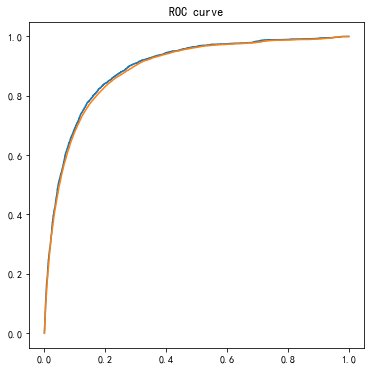

In [27]:
y=choose_feature_data[["车牌号","是否成交"]]
x=choose_feature_data.loc[:,'对话轮询次数':]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.80,random_state = 42)
逻辑回归训练集备份=train_y.copy()
逻辑回归测试集备份=test_y.copy()
train_y=train_y['是否成交']
test_y=test_y['是否成交']
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
Cs = [1, 10,100,1000]
# LogisticRegressionCV比GridSearchCV快
model= LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
model.fit(train_x,train_y.astype('int'))  
# 查看模型预测结果
train_est = model.predict(train_x)  #  用模型预测训练集的结果
train_est_p=model.predict_proba(train_x)[:,1]  #用模型预测训练集的概率
test_est=model.predict(test_x)  #  用模型预测测试集的结果
test_est_p=model.predict_proba(test_x)[:,1]  #  用模型预测测试集的概率
# 查看测试集预测结果与真实结果对比
pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p}).T 
print(metrics.confusion_matrix(test_y.astype('int'), test_est,labels=[0,1]))  # 混淆矩阵
print(metrics.classification_report(test_y.astype('int'), test_est))  # 计算评估指标
import sklearn.metrics as metrics
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'),test_est)
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test)) 
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'), test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_y.astype('int'), train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.title('ROC curve')
plt.show()

In [28]:
##输出测试集,训练集结果
输出结果=pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p})
逻辑回归推出数据集=pd.concat([逻辑回归测试集备份,输出结果],axis=1)
del 逻辑回归推出数据集['是否成交']

支持向量机

In [ ]:
y=choose_feature_data[["车牌号","是否成交"]]
x=choose_feature_data.loc[:,'对话轮询次数':]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.80,random_state = 42)
支持向量机训练集备份=train_y.copy()
支持向量机测试集备份=test_y.copy()
train_y=train_y['是否成交']
test_y=test_y['是否成交']
from sklearn import svm
model = sklearn.svm.SVC(kernel='linear')
model.fit(train_x,train_y.astype('int'))

In [ ]:
# 查看模型预测结果
train_est = model.predict(train_x)  #  用模型预测训练集的结果
train_est_p=model.predict_proba(train_x)[:,1]  #用模型预测训练集的概率
test_est=model.predict(test_x)  #  用模型预测测试集的结果
test_est_p=model.predict_proba(test_x)[:,1]  #  用模型预测测试集的概率
# 查看测试集预测结果与真实结果对比
pd.DataFrame({'test_target':test_y,'test_est':test_est,'test_est_p':test_est_p}).T 
print(metrics.confusion_matrix(test_y.astype('int'), test_est,labels=[0,1]))  # 混淆矩阵
print(metrics.classification_report(test_y.astype('int'), test_est))  # 计算评估指标
import sklearn.metrics as metrics
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'),test_est)
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test)) 
fpr_test, tpr_test, th_test = metrics.roc_curve(test_y.astype('int'), test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_y.astype('int'), train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.title('ROC curve')
plt.show()

In [ ]:
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)


In [ ]:
推出数据集=pd.concat([逻辑回归推出数据集,随机森林推出数据集,决策树推出数据集],axis=1)
推出数据集['并集']=推出数据集.iloc[:,2]+推出数据集.iloc[:,6]+推出数据集.iloc[:,10]
推出数据集_groupby=pd.concat([推出数据集.iloc[:,1],推出数据集['并集']],axis=1)
推出数据集_groupby['并集'][推出数据集_groupby['并集']>0]=1

In [ ]:
print(metrics.confusion_matrix(推出数据集_groupby['test_target'].astype('int'), 推出数据集_groupby['并集'],labels=[0,1]))  # 混淆矩阵
print(metrics.classification_report(推出数据集_groupby['test_target'].astype('int'), 推出数据集_groupby['并集']))  # 计算评估指
fpr_test, tpr_test, th_test = metrics.roc_curve(推出数据集_groupby['test_target'].astype('int'), 推出数据集_groupby['并集'])
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test)) 

In [ ]:
import os
os.chdir("C:\\Users\\HMJ\\Desktop\\太平洋产能提升")
writer= pd.ExcelWriter('训练模型数据集.xlsx')
choose_feature_data.to_excel(writer,'训练模型数据集')
writer.save()